In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250_min_1e-20_max_1.899e-19_ng_4_dlogN_0.426_0.426_0.426__P_1_T_250_ng_3',
                          'wgt_1_.9_.85_.7_.65_.55_.5',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250_min_1e-20_max_1.899e-19_ng_4_dlogN_0.426_0.426_0.426__P_1_T_250_ng_3',
                               'wgt_1_.9_.85_.7_.65_.55_.5',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 7 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [9]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()
    
def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_high',
            'temperature_reference_high', 
            'pressure_reference_low', 
            'temperature_reference_low',
            'ighigh', 
            'ng', 
            'absth',
            'wgt']


def pattern_assign(name):
    return ''' 
    parameter .* :: .* ({} .* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/]+ {}[^,] [^/]+ / [^/]+ /)
    '''.format(name)


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results



    

print('\n\n'.join(get_input_params(c, innames())))

vstar = 980

nband = 120

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_high = 1.

temperature_reference_high = 250.

pressure_reference_low = 50.

temperature_reference_low = 250.

ighigh = 4

ngas = 6      

ng = 7

data absth(:, 1)
!     &    /2.000000e-22, 3.8470878e-22, 7.40004238e-22,
!     &     1.423430e-21, 1.10733E-20,   2.93308E-19,
!     &     2.31589E-17/

data absth(:, 2)
     &    /1.000e-20,  2.668e-20,  7.117e-20,
     &     1.899e-19,   2.633e-19,   3.652e-19,
     &     5.065e-19/

data wgt
     &     /  1.00, 0.90, 0.85,
     &     0.70, 0.65, 0.55, 0.50/


In [10]:
fig.display_hrefanchor()

In [11]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [12]:
table_dgdgs.display_hrefanchor()

In [13]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

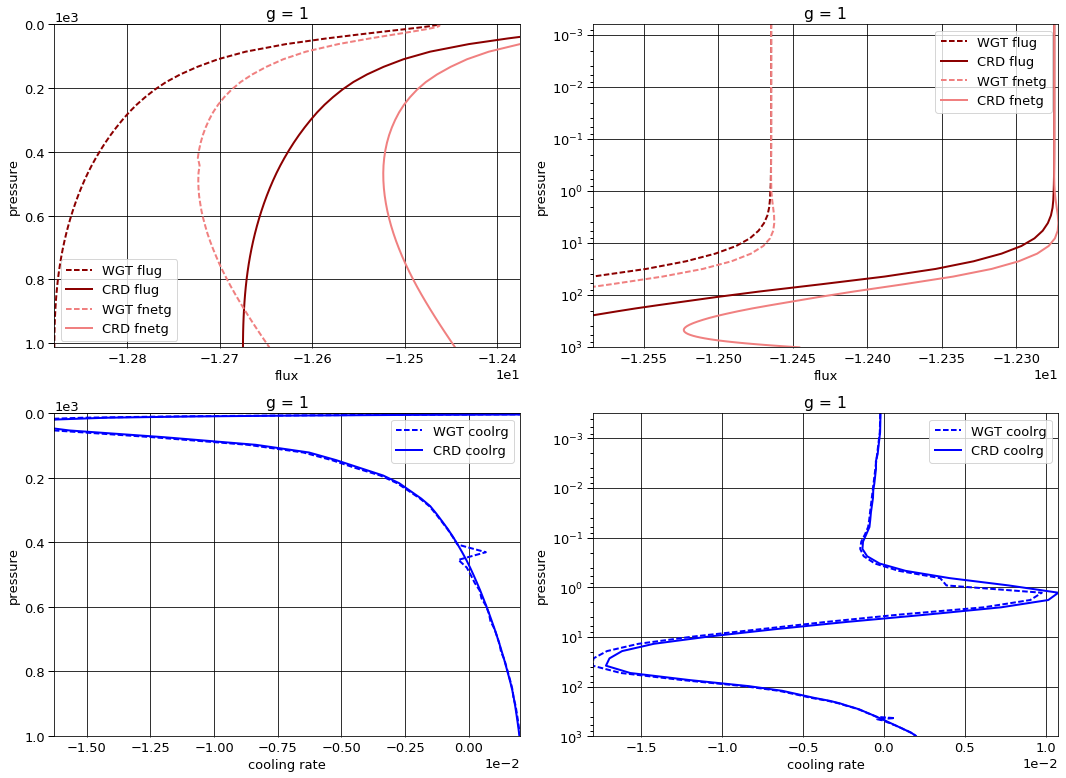

# Figure: flux, cooling rate. g-group 2

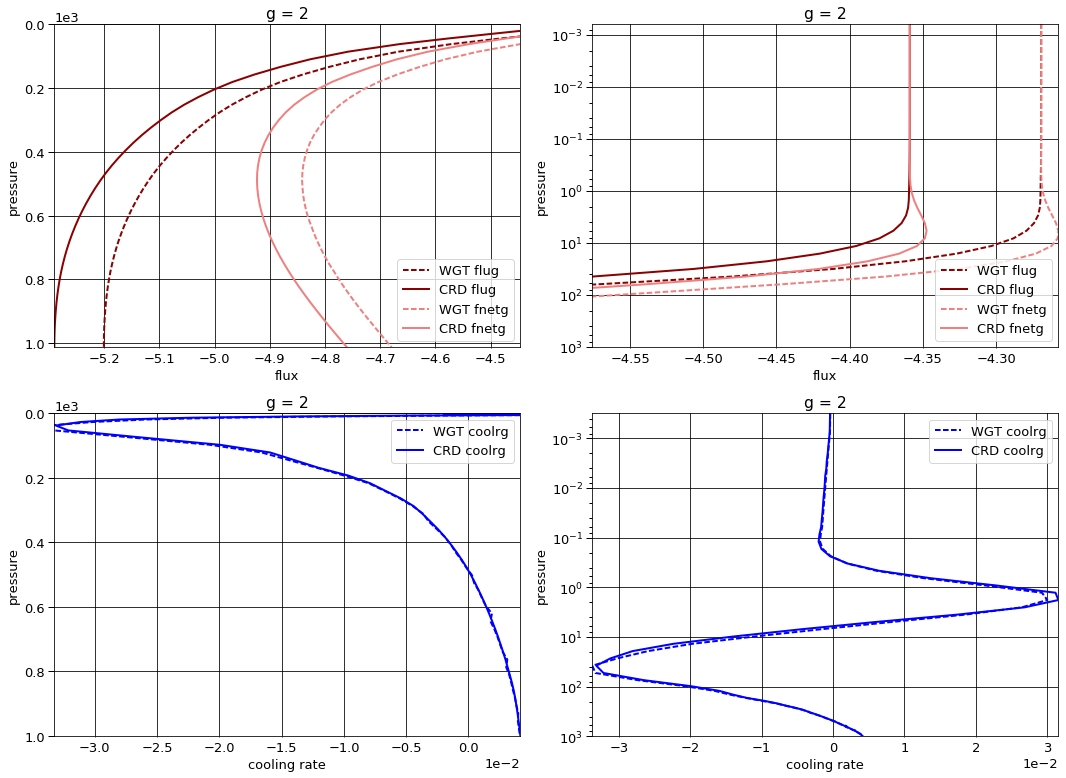

# Figure: flux, cooling rate. g-group 3

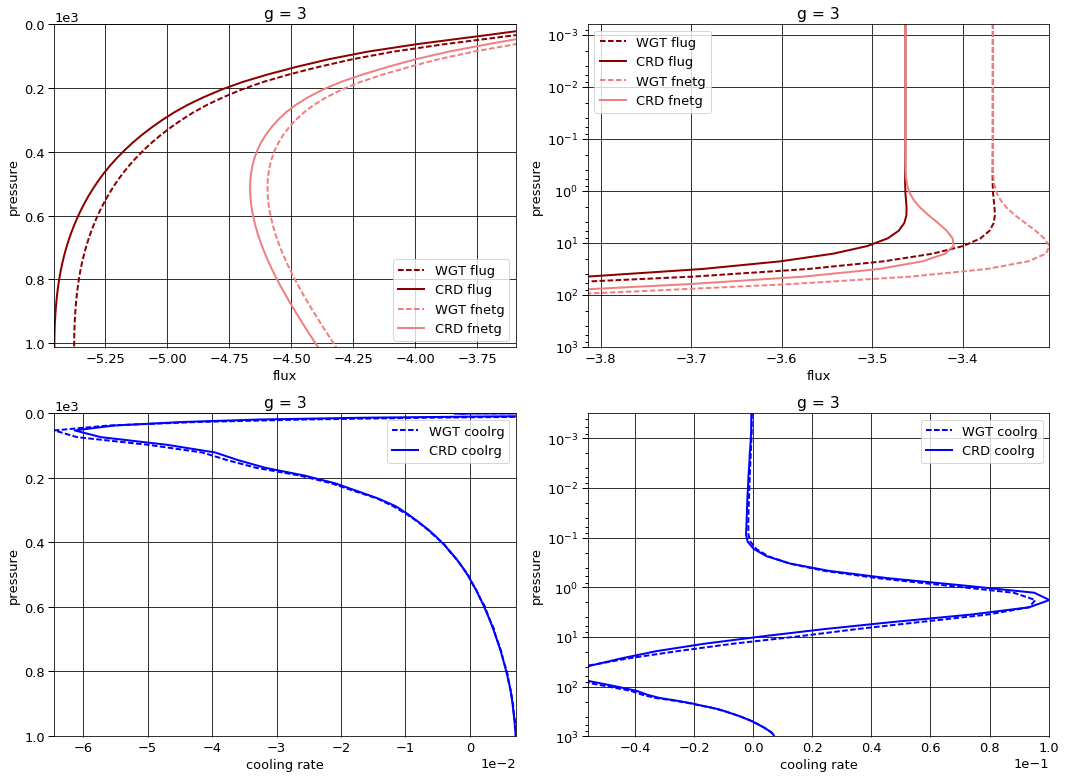

# Figure: flux, cooling rate. g-group 4

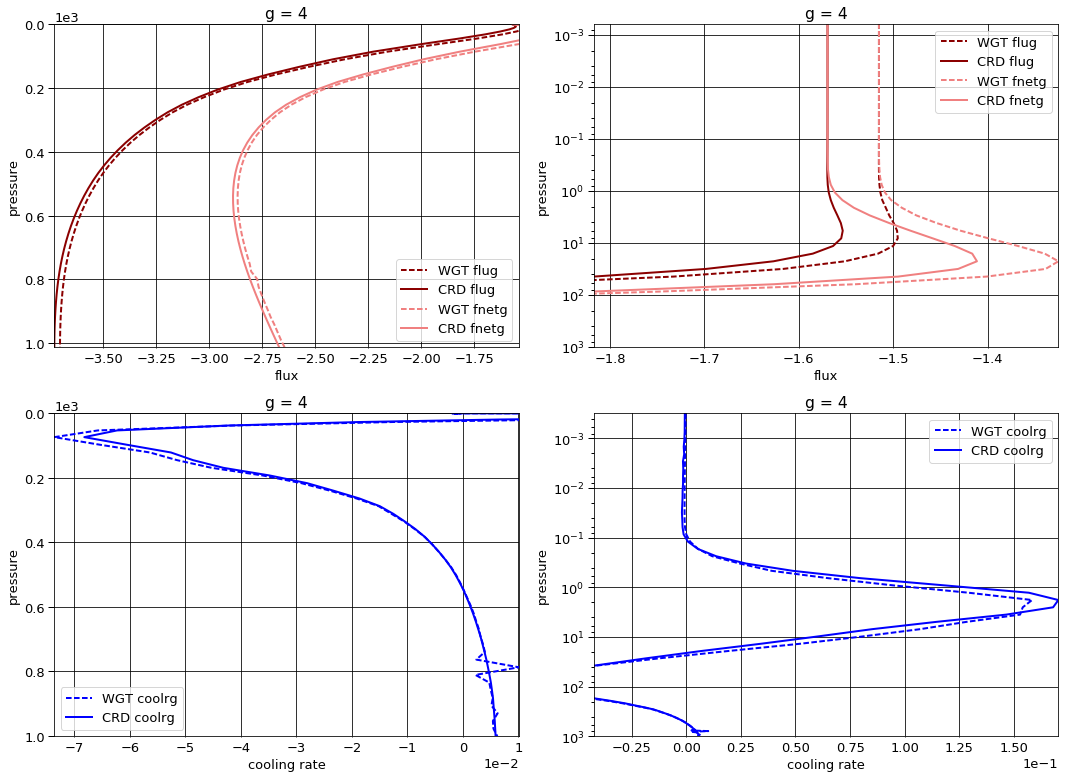

# Figure: flux, cooling rate. g-group 5

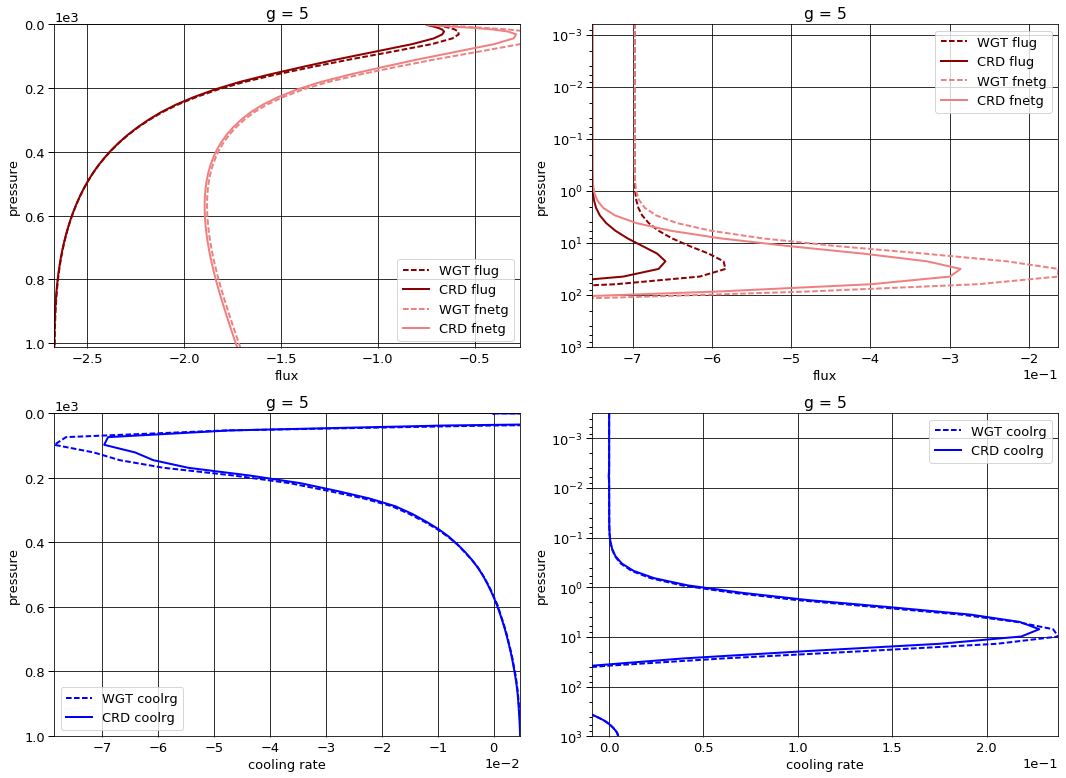

# Figure: flux, cooling rate. g-group 6

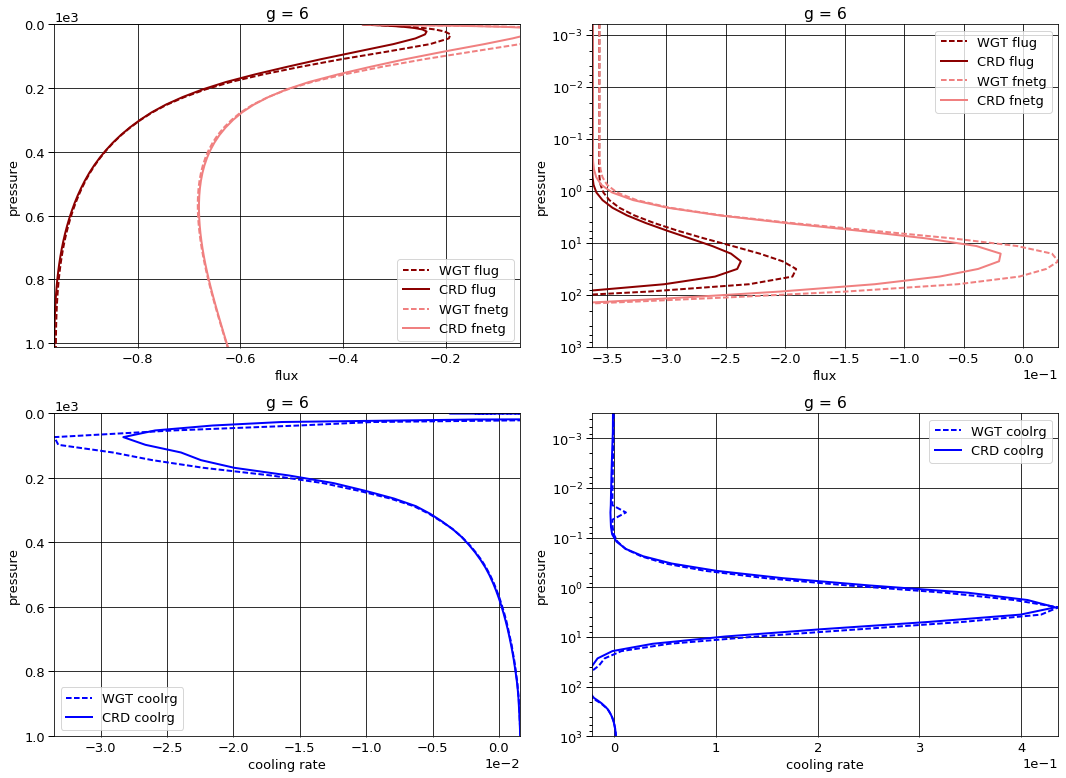

# Figure: flux, cooling rate. g-group 7

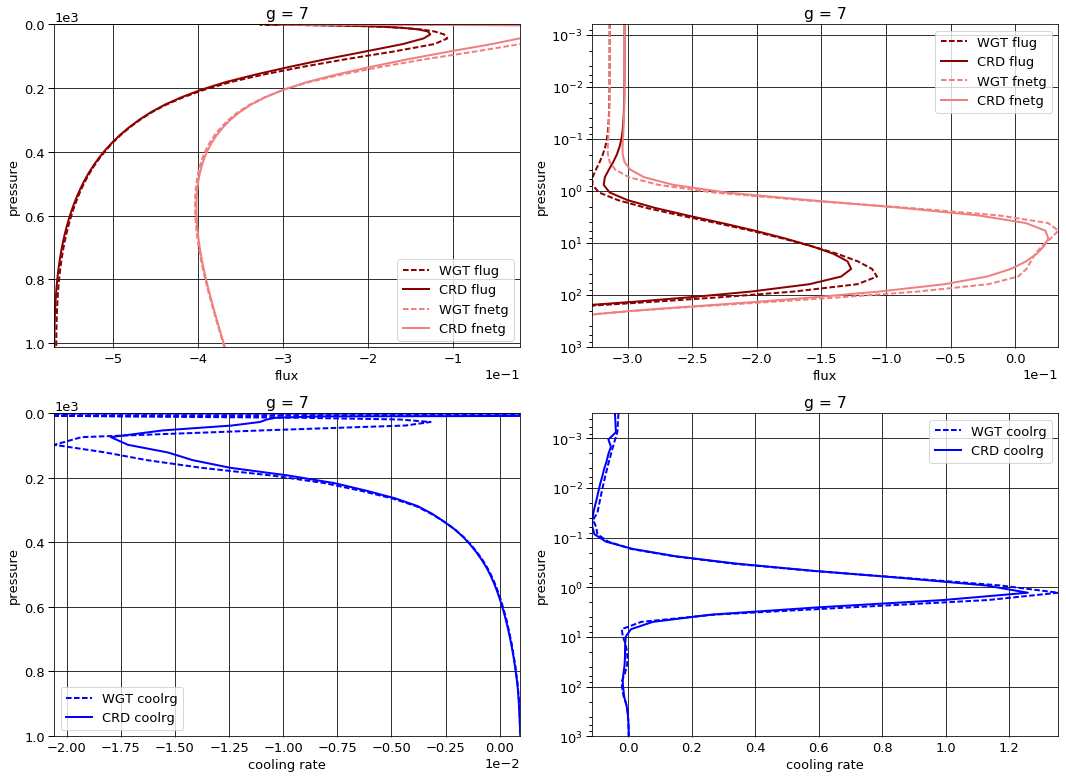

# Figure: flux, cooling rate. g-group total

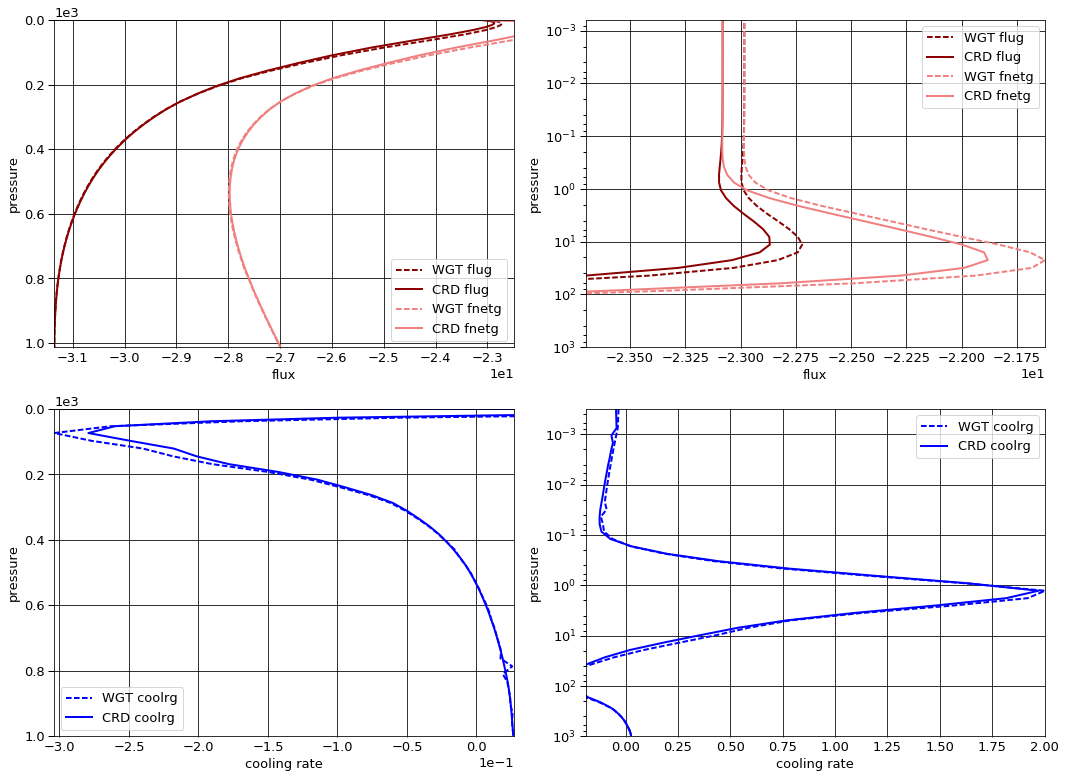

In [14]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [15]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1     -12.274527  0.000000 -12.274527
  1013.0   76    -12.674908  0.229195 -12.445712
2 0.0      1      -4.358967  0.000000  -4.358967
  1013.0   76     -5.290591  0.530449  -4.760142
3 0.0      1      -3.463169  0.000000  -3.463169
  1013.0   76     -5.455917  1.064528  -4.391390
4 0.0      1      -1.569582  0.000000  -1.569582
  1013.0   76     -3.731833  1.061202  -2.670631
5 0.0      1      -0.750715  0.000000  -0.750715
  1013.0   76     -2.669752  0.943508  -1.726244
6 0.0      1      -0.361985  0.000000  -0.361985
  1013.0   76     -0.961969  0.338040  -0.623929
7 0.0      1      -0.302401  0.000000  -0.302401
  1013.0   76     -0.569265  0.200757  -0.368507


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1     -12.464636  0.000000 -12.464636
  1013.0   76    -12.878752  0.232341 -12.646411
2 0.0      1      -4.269253  0.000000  -4.269253
  1013.0   76     -5.200884  0.521616  -4.679267
3 0.0      1      -3.366613  0.000000  -3.366613
  1013.0   76     -5.375945  1.057806  -4.318139
4 0.0      1      -1.515103  0.000000  -1.515103
  1013.0   76     -3.705025  1.059700  -2.645325
5 0.0      1      -0.697262  0.000000  -0.697262
  1013.0   76     -2.667723  0.957534  -1.710189
6 0.0      1      -0.356423  0.000000  -0.356423
  1013.0   76     -0.958917  0.334239  -0.624678
7 0.0      1      -0.313961  0.000000  -0.313961
  1013.0   76     -0.566989  0.197778  -0.369211


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.190109  0.000000 -0.190109
  1013.0   76    -0.203844  0.003146 -0.200699
2 0.0      1      0.089714  0.000000  0.089714
  1013.0   76     0.089707 -0.008833  0.080874
3 0.0      1      0.096556  0.000000  0.096556
  1013.0   76     0.079973 -0.006722  0.073251
4 0.0      1      0.054479  0.000000  0.054479
  1013.0   76     0.026808 -0.001502  0.025306
5 0.0      1      0.053453  0.000000  0.053453
  1013.0   76     0.002029  0.014026  0.016055
6 0.0      1      0.005562  0.000000  0.005562
  1013.0   76     0.003052 -0.003801 -0.000749
7 0.0      1     -0.011560  0.000000 -0.011560
  1013.0   76     0.002276 -0.002979 -0.000704

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000213
  1001.112500 75     0.001983
2 0.000312    1     -0.000410
  1001.112500 75     0.004173
3 0.000312    1     -0.000641
  1001.112500 75     0.007119
4 0.000312    1     -0.000639
  1001.112500 75     0.005885
5 0.000312    1     -0.000010
  1001.112500 75     0.004727
6 0.000312    1     -0.001217
  1001.112500 75     0.001606
7 0.000312    1     -0.042512
  1001.112500 75     0.000955


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000228
  1001.112500 75     0.002008
2 0.000312    1     -0.000380
  1001.112500 75     0.004150
3 0.000312    1     -0.000479
  1001.112500 75     0.007096
4 0.000312    1     -0.000310
  1001.112500 75     0.006191
5 0.000312    1     -0.000003
  1001.112500 75     0.004765
6 0.000312    1     -0.000568
  1001.112500 75     0.001618
7 0.000312    1     -0.031501
  1001.112500 75     0.000960


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000015
  1001.112500 75     0.000025
2 0.000312    1      0.000031
  1001.112500 75    -0.000023
3 0.000312    1      0.000163
  1001.112500 75    -0.000023
4 0.000312    1      0.000328
  1001.112500 75     0.000306
5 0.000312    1      0.000007
  1001.112500 75     0.000038
6 0.000312    1      0.000649
  1001.112500 75     0.000012
7 0.000312    1      0.011011
  1001.112500 75     0.000005

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-23.081346,0.00000,-23.081346
1013.0,76,-31.354235,4.36768,-26.986555



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-22.983251,0.000000,-22.983251
1013.0,76,-31.354235,4.361014,-26.993221



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,9.809506e-02,0.000000,0.098095
1013.0,76,4.100000e-07,-0.006666,-0.006666


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.045643
1001.112500,75,0.026448



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.033470
1001.112500,75,0.026788



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.012173
1001.112500,75,0.000340


In [16]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.410750,0.402196
2,0.165875,0.169859
3,0.171458,0.174865
4,0.118167,0.119209
5,0.085083,0.085039
6,0.030583,0.030673
7,0.018083,0.018159


In [17]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')